import dependencies -> import data -> read data -> visualize the data ->

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/emotions.csv')
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [3]:
df.tail(5)

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
2127,32.400,32.2,32.2,30.80,23.4,1.64,-2.03,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.2,47.2,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.20,1.09,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.8,-59.8,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.08,6.90,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.5,-10.5,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.46,1.58,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.0,-271.0,552.00,NEGATIVE
2131,27.000,32.0,31.8,25.00,28.9,4.99,1.95,6.210,3.490,-3.51,...,1.95,1.810,1.810,1.95,110.0,-6.71,22.8,22.8,-6.71,NEUTRAL


In [4]:
# sample column
df.sample()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
105,7.51,28.7,17.6,2.36,21.5,-1.49,0.26,-5.43,0.0817,0.187,...,21.8,7.02,7.02,21.8,-0.789,-18.2,-1.34,-1.34,-18.2,POSITIVE


In [5]:
# data size
df.shape

(2132, 2549)

no of observations = 1004no of features = 2549

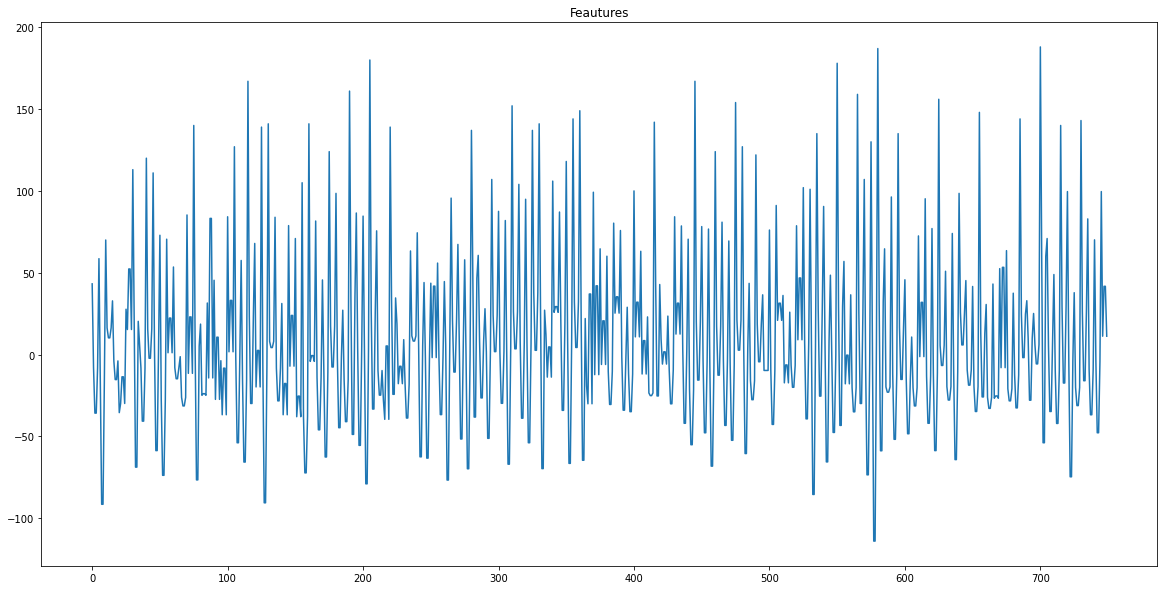

In [6]:
# plot the data 
data = df.loc[10, 'fft_0_b':'fft_749_b']
plt.figure(figsize=(20, 10))
plt.plot(range(len(data)), data)
plt.title('Feautures')
plt.show()

In [7]:
# check for imbalance

df['label'].value_counts()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

data is fairly balanced

In [8]:
# enumarate the data

# create a dictionary

label_dict = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

In [9]:
# change the values

df['label'] = df['label'].replace(label_dict)

In [10]:
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,0
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,1
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,2
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,2
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,1


In [11]:
# separate data and labels

X = df.drop('label', axis = 1)
y = df['label']

In [12]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3, test_size = 0.2)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1705, 2548)
(427, 2548)
(1705,)
(427,)


## Create the RNN model

In [14]:
# import libraries

import tensorflow as tf
from tensorflow import keras

from keras import layers, Model

In [15]:
# stack the layers

input_layer = layers.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(input_layer, axis=2)
gru = layers.GRU(256, return_sequences=True)(expand_dims)

flatten = layers.Flatten()(gru)
output_layer = layers.Dense(3, activation='softmax')(flatten)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 2548, 1)          0         
                                                                 
 gru (GRU)                   (None, 2548, 256)         198912    
                                                                 
 flatten (Flatten)           (None, 652288)            0         
                                                                 
 dense (Dense)               (None, 3)                 1956867   
                                                                 
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________________________


In [16]:
# compile the model

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [17]:
# early stop and checkpoints

from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_loss', min_delta= 0.01, patience = 3, verbose = 1, mode = 'auto', restore_best_weights = True)
mcp = ModelCheckpoint(monitor='val_loss', filepath= './bestmodel.h5', verbose = 1, save_best_only = True, mode = 'auto')

cb = [es, mcp]

In [18]:
# train the model

history = model.fit(X_train, y_train, batch_size = 32, epochs = 30, verbose = 1, validation_split = 0.2, callbacks = cb)

Epoch 1/30
43/43 [==============================] - ETA: 0s - loss: 31.3415 - accuracy: 0.8094
Epoch 1: val_loss improved from inf to 12.13715, saving model to ./bestmodel.h5
43/43 [==============================] - 14s 158ms/step - loss: 31.3415 - accuracy: 0.8094 - val_loss: 12.1372 - val_accuracy: 0.8504
Epoch 2/30
43/43 [==============================] - ETA: 0s - loss: 5.1701 - accuracy: 0.9194
Epoch 2: val_loss improved from 12.13715 to 9.45076, saving model to ./bestmodel.h5
43/43 [==============================] - 5s 118ms/step - loss: 5.1701 - accuracy: 0.9194 - val_loss: 9.4508 - val_accuracy: 0.8974
Epoch 3/30
43/43 [==============================] - ETA: 0s - loss: 2.8951 - accuracy: 0.9435
Epoch 3: val_loss improved from 9.45076 to 5.26295, saving model to ./bestmodel.h5
43/43 [==============================] - 6s 135ms/step - loss: 2.8951 - accuracy: 0.9435 - val_loss: 5.2630 - val_accuracy: 0.9062
Epoch 4/30
43/43 [==============================] - ETA: 0s - loss: 1.4831

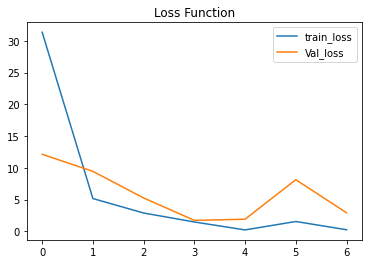

In [19]:
# loss function

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss Function')
plt.legend(['train_loss', 'Val_loss'])
plt.show()

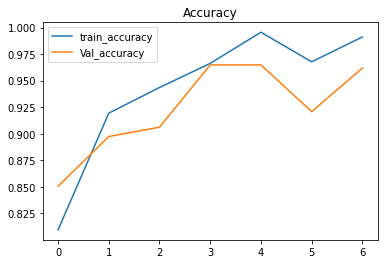

In [20]:
# accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Accuracy')
plt.legend(['train_accuracy', 'Val_accuracy'])
plt.show()

In [21]:
# load model

from keras.models import load_model

best_model = load_model("/content/bestmodel.h5")

In [22]:
# evaluate the model

loss, acc = best_model.evaluate(X_test, y_test, verbose = 1)
print('The accuracy score is', acc*100)

14/14 [==============================] - 1s 58ms/step - loss: 2.6640 - accuracy: 0.9602
The accuracy score is 96.01873755455017


In [23]:
# make prediction

y_pred = best_model.predict(X_test, verbose = 1)
y_pred

14/14 [==============================] - 1s 51ms/step


array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 4.3727457e-38, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [24]:
y_pred_class = np.array(list(map(lambda x: np.argmax(x), y_pred)))
y_pred_class

array([2, 0, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1,
       0, 2, 1, 1, 2, 0, 0, 1, 0, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2,
       1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2, 2, 0, 1, 1,
       0, 1, 2, 0, 2, 2, 0, 1, 0, 1, 0, 0, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1,
       1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 0, 0, 0, 1, 2,
       2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 2, 2,
       2, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 1, 0, 0,
       1, 2, 2, 0, 2, 1, 2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 2,
       0, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 2, 2, 0, 2, 0, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 0, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 2, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 2,
       1, 2, 1, 2, 0, 1, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0, 1, 1, 2, 1, 2, 2,
       2, 0, 2, 0, 1, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 0, 2, 2, 1,
       0, 2, 2, 0, 0, 1, 2, 0, 2, 0, 2, 0, 1, 0, 0,

In [30]:
# evaluation

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred_class)
report = classification_report(y_test, y_pred_class, target_names = label_dict.keys())

print('Confusion Matrix')
print('----------------------------')
print()
print(cm)
print()
print()
print()
print('Classification Report')
print('----------------------------')
print()
print(report)

Confusion Matrix
----------------------------

[[122   0   2]
 [  0 147   4]
 [ 11   0 141]]



Classification Report
----------------------------

              precision    recall  f1-score   support

    NEGATIVE       0.92      0.98      0.95       124
     NEUTRAL       1.00      0.97      0.99       151
    POSITIVE       0.96      0.93      0.94       152

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427

